# Part A

If action is 0 : 
$
\nabla_{\theta} \left(\log \left( \pi \left( A_1 \, | \, S \right) \right) \right) = \begin{bmatrix}
    \frac{S e^{\theta_2^T S}}{e^{\theta_1^T S} + e^{\theta_2^T S}} \\
    \frac{-S e^{\theta_2^T S}}{e^{\theta_1^T S} + e^{\theta_2^T S}}
\end{bmatrix}
$

If action is 1 :
$
\nabla_{\theta} \left(\log \left( \pi \left( A_2 \, | \, S \right) \right) \right) = \begin{bmatrix}
    \frac{-S e^{\theta_1^T S}}{e^{\theta_1^T S} + e^{\theta_2^T S}} \\
    \frac{S e^{\theta_1^T S}}{e^{\theta_1^T S} + e^{\theta_2^T S}}
\end{bmatrix}
$

Here vectors 
$
 {\theta_1,} {\theta_2}
$
 and S are 4x1 real vectors. 
 
The output gradient in the above case is of size 2x4.
 
The gradient can also be written as follows -
$
\nabla \ln \pi \left( \frac{A_t}{S_t}, \theta \right) = x(s, a) - \sum_{b} \pi \left( \frac{b}{S_t}, \theta \right) x(s, b)
$

{align*}
ign*}


### REINFORCE: Monte Carlo Policy-Gradient Control
Q2.

In [1]:
# !pip install "gymnasium"
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random

In [2]:
'''This function generates gradient of the log(p) function for each action separately'''
def grad(action,state,parameter):
    g = np.zeros((2,4))
    t = math.exp(np.dot(parameter[0,:],state)) + math.exp(np.dot(parameter[1,:],state))
    # print('t',t)
    if action == 0:
        # e = state*math.exp(np.dot(parameter[1,:],state))/t
        # print(e)
        g[0] =  state*math.exp(np.dot(parameter[1,:],state))/t 
        g[1] =  - ( state*math.exp(np.dot(parameter[1,:],state))/t )
    if action == 1:
        # e = state*math.exp(np.dot(parameter[0,:],state))/t
        # print(e)
        g[0] =  -( state*math.exp(np.dot(parameter[0,:],state))/t )
        g[1] = ( state*math.exp(np.dot(parameter[0,:],state))/t )
    return g

In [3]:
'''THis is policy function which generates policy in current state'''
def policy(parameter, state):
    t = math.exp(np.dot(parameter[0,:],state)) + math.exp(np.dot(parameter[1,:],state))
    policy = np.zeros(2)
    policy[0] = math.exp(np.dot(parameter[0,:],state))/t
    policy[1] = math.exp(np.dot(parameter[1,:],state))/t
    return  policy

In [10]:
'''Training REINFORCE: Monte Carlo Policy Gradient'''

env = gym.make('CartPole-v1')

# inintializing the parameters randomly
parameter = np.random.rand(2,4)
step = 0.01  # step size for gradient update
gamma = 0.99 # gamma
episodes=1000
epoch = 1

TT = [] 
RR = []     # vector for storing return in each episode
RRR = []
for ep in range(epoch):
    for e in range(episodes):
        initial_state=env.reset()
        
        S = []     # vector to store steps 
        A = []     # vector to store actions
        R = []     # vector to store rewards
        T = 0
        k = 0
        r = 0
        
        state = initial_state[0]   # initial state
        S.append(state)
        
        # generate an episode
        while True:
            k += 1
            p = policy(parameter, state)
            # print(p)
            action = random.choices([0,1], p)     # generating an action using policy
            action = action[0]
            A.append(action)

            # taking action 
            state, reward, terminated, truncated, info = env.step(action)  
            r += reward
            R.append(reward)
            
            # time.sleep(1/60)
            if k == 500:
                break
            if (terminated):
                # time.sleep(1)
                break
            S.append(state)
        
        T = len(S)
        TT.append(T)
        RRR.append(r)
        g1 = [gamma ** i for i in range(T)]
        rr = np.dot(g1,R)
        RR.append(rr)   # storing return

        # applying policy gradient
        for t in range(T):
            g = [gamma ** i for i in range(T-t)]
            G = np.dot(g,R[t:])
            d = grad(A[t], S[t], parameter)
            parameter = parameter + step*(gamma**t)*G*d

final_para = parameter  # Final parameters

Q3.

Text(0.5, 1.0, 'REINFORCE: gamma = 0.99, step = 0.01')

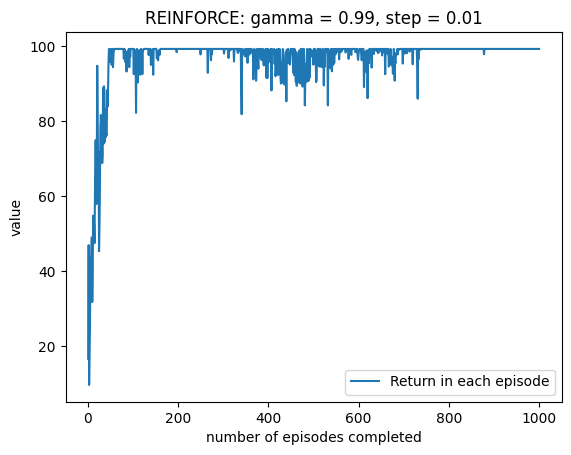

In [11]:
plt.plot(np.arange(1,episodes*epoch+1),RR,label='Return in each episode')
plt.ylabel('value')
plt.xlabel('number of episodes completed')
plt.legend()
plt.title('REINFORCE: gamma = 0.99, step = 0.01')

Q4.

In [29]:
# test 
env = gym.make('CartPole-v1')
env.reset()
# env.render()
parameter = final_para 
T = []
episode = 5
Ret = []
for e in range(episode):
    initial_state=env.reset()
    state = initial_state[0]
    R = 0
    k = 0
    while True:
        
        # print(k)
        p = policy(parameter, state)
        action = random.choices([0,1], p)
        action = action[0]
        state, reward, terminated, truncated, info = env.step(action)
        R += (gamma**k)*reward
        # time.sleep(1/60)
        if k == 100000:
            break
        if (terminated):
            # time.sleep(1)
            break
        k += 1
    Ret.append(R)
    T.append(k)
# env.close()
print('Averege Return in each episode(Monte Carlo):' , np.mean(Ret))
print('Averag number of steps taken in each episodes(Monte Carlo):', np.mean(T))

Averege Return in each episode(Monte Carlo): 99.99999999999925
Averag number of steps taken in each episodes(Monte Carlo): 100000.0


### REINFORCE with Baseline
Q5.

In [13]:
def value(parameter1, state):
    value = np.dot(parameter1, state)
    return  value

In [14]:
def vgrad(state):
    vg = state
    return vg

In [15]:
'''Training REINFORCE with Baseline'''
env = gym.make('CartPole-v1')

# inintializing the parameters randomly
parameter = np.random.rand(2,4)
parameter1 = np.random.rand(4)

step = 0.01   # step size for update 
step1 = 0.01  # step size for update of value function
gamma1 = 0.99 

# simulate the environment
episodes=1000
epoch = 1
# timeSteps=10
TT1 = []
RR1 = []

for ep in range(epoch):
    for e in range(episodes):
        initial_state=env.reset()  # initial state

        # generate an episode
        S = []
        A = []
        R = []
        T = 0
        k = 0
        r = 0
        state = initial_state[0]
        S.append(state)
        while True:
            k += 1
            p = policy(parameter, state)
            action = random.choices([0,1], p)
            action = action[0]
            A.append(action)
            state, reward, terminated, truncated, info = env.step(action)
            R.append(reward)
            # time.sleep(1/60)
            if k == 500:
                break
            if (terminated):
                # time.sleep(1)
                break
            S.append(state)
            
        T = len(R)
        TT1.append(T)
        g1 = [gamma1 ** i for i in range(T)]
        rr = np.dot(g1,R)
        RR1.append(rr)
        
        # applying policy gradient
        for t in range(T):
            g = [gamma1 ** i for i in range(T-t)]
            G = np.dot(g,R[t:])
            d = G - value(parameter1,S[t])
            parameter1 += step1*d*vgrad(S[t])
            Grad = grad(A[t], S[t], parameter)
            parameter = parameter + step*(gamma**t)*d*Grad

final_para_b = parameter

Q6. 

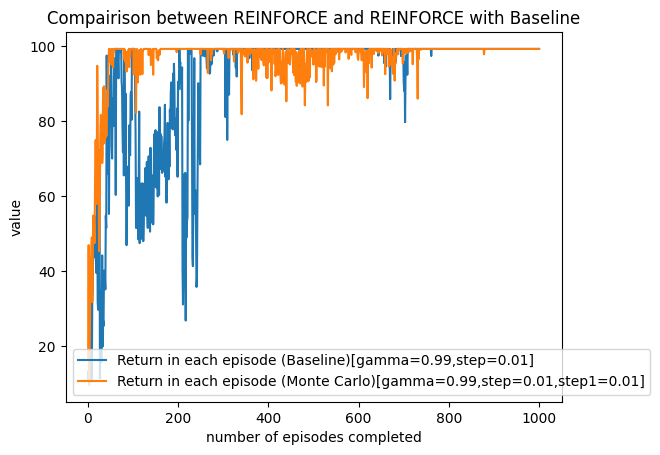

In [19]:
# plt.plot(np.arange(1,episodes*epoch+1),TT)
plt.plot(np.arange(1,episodes*epoch+1),RR1, label='Return in each episode (Baseline)[gamma=0.99,step=0.01]')
plt.plot(np.arange(1,episodes*epoch+1),RR,label='Return in each episode (Monte Carlo)[gamma=0.99,step=0.01,step1=0.01]')
plt.ylabel('value')
plt.xlabel('number of episodes completed')
plt.legend()
plt.title('Compairison between REINFORCE and REINFORCE with Baseline')
plt.show()

In [51]:
# test 
env = gym.make('CartPole-v1')
env.reset()

parameter = final_para_b
k = 0
episode = 5
Ret = []
T = []
for e in range(episode):
    initial_state=env.reset()
    state = initial_state[0]
    # print(e)
    R = 0
    k = 0
    while True:
        
        p = policy(parameter, state)
        action = random.choices([0,1], p)
        action = action[0]
        state, reward, terminated, truncated, info = env.step(action)
        R += (gamma1**k)*reward
        # time.sleep(1/60)
        if k == 100000:
            break
        if (terminated):
            # time.sleep(1)
            break
        k += 1
    Ret.append(R)
    T.append(k)
# env.close()
print('Averege Return in each episode (Baseline):' , np.mean(Ret))
print('Averag number of steps taken in each episodes(Baseline:)', np.mean(T))

Averege Return in each episode (Baseline): 99.99999999999925
Averag number of steps taken in each episodes(Baseline:) 100000.0


It can be seen that REINFORCE with Baseline and REINFORCE Monte Carlo method both have approximately same average return.

# Part B
One Step Actor Critic

In [24]:
env = gym.make('CartPole-v1')
parameter = np.random.rand(2,4)
parameter1 = np.random.rand(4)
step = 0.01
step1 = 0.01
gamma = 0.99

# simulate the environment
episodes=1000

TT = []
RR3 = []
for e in range(episodes):
    initial_state=env.reset()
    # generate an episode
    T = 0
    k = 0
    R = []
    state = initial_state[0]
    I = 1
    while True:       
        p = policy(parameter, state)
        action = random.choices([0,1], p)
        action = action[0]
        next_state, reward, terminated, truncated, info = env.step(action)
        
        R.append(reward)
        if (terminated):
            V = 0
        else:
            V = value(parameter1, next_state)
        
        Vi = value(parameter1, state)
        d = reward + (gamma*V) - Vi
        Grad = grad(action, state, parameter)
        vGrad = vgrad(state)
        parameter += step*I*d*Grad
        parameter1 += step1*d*vGrad
        I = gamma*I
        # time.sleep(1/60)
        if k == 500:
            break
        if (terminated):
            # time.sleep(1)
            break
        state = next_state
        k += 1

    
    T = len(R)
    TT.append(T)
    g1 = [gamma ** i for i in range(T)]
    rr = np.dot(g1,R)
    RR3.append(rr)

final_para_a = parameter
# env.close()   

gamma in all cases is 0.99 and step is 0.01


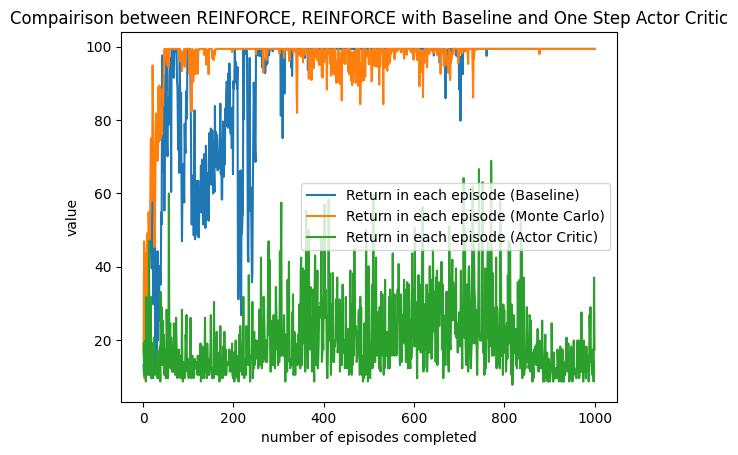

In [27]:
print('gamma in all cases is 0.99 and step is 0.01')
plt.plot(np.arange(1,episodes*epoch+1),RR1, label='Return in each episode (Baseline)')
plt.plot(np.arange(1,episodes*epoch+1),RR,label='Return in each episode (Monte Carlo)')
plt.plot(np.arange(1,episodes*epoch+1),RR3,label='Return in each episode (Actor Critic)')
# NOTE - gamma in all cases is 0.99 and step is 0.01
plt.ylabel('value')
plt.xlabel('number of episodes completed')
plt.legend()
plt.title('Compairison between REINFORCE, REINFORCE with Baseline and One Step Actor Critic')
plt.show()

In [ ]:
# test 
env = gym.make('CartPole-v1')
env.reset()

parameter = final_para_b
k = 0
episode = 5
Ret = []
T = []
for e in range(episode):
    initial_state=env.reset()
    state = initial_state[0]
    # print(e)
    R = 0
    k = 0
    while True:
        
        p = policy(parameter, state)
        action = random.choices([0,1], p)
        action = action[0]
        state, reward, terminated, truncated, info = env.step(action)
        R += (gamma1**k)*reward
        # time.sleep(1/60)
        if k == 100000:
            break
        if (terminated):
            # time.sleep(1)
            break
        k += 1
    Ret.append(R)
    T.append(k)
# env.close()
print('Averege Return in each episode (Baseline):' , np.mean(Ret))
print('Averag number of steps taken in each episodes(Baseline:)', np.mean(T))